Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import urllib2

Import data

In [2]:
raw = list()
for line in urllib2.urlopen('http://www.suave.net/~dave/tmp/colors_by_weight_raw.txt'):
    raw.append(line.strip('\n').strip('\r').split('\t'))
raw = np.array(raw)

Get the colors and dates

In [3]:
colors = raw[1:, 0].astype(str)
dates = raw[0, 1:].astype(int)
data = raw[1:, 1:].astype(int)

Transform raw data into percentages

In [4]:
percent = data / data.sum(axis=0).astype(float)

Sort by overall amount per color

In [5]:
sort = percent.sum(axis=1).argsort()

Get color correspondance (This I did semi automatically by copy pasting the colors in the web...)

In [6]:
colors = raw[1:, 0].astype(str)
colors = np.array([color.lower().replace(' ', '').replace('-', '').replace('tr.', '') for color in colors])
colors_dict = {'darkazure': [0.0, 0.2, 0.6], 'indigo': [0.29411764705882354, 0.0, 0.5098039215686274], 'gold': [1.0, 0.8431372549019608, 0.0], 'flesh': [1.0, 0.7529411764705882, 0.796078431372549], 'firebrick': [0.6980392156862745, 0.13333333333333333, 0.13333333333333333], 'indianred': [0.803921568627451, 0.3607843137254902, 0.3607843137254902], 'neonorange': [1.0, 0.6470588235294118, 0.0], 'yellow': [1.0, 1.0, 0.0], 'chromepink': [1.0, 0.7529411764705882, 0.796078431372549], 'speckleblackgold': [0.8627450980392157, 0.7372549019607844, 0.5058823529411764], 'darkseagreen': [0.5607843137254902, 0.7372549019607844, 0.5607843137254902], 'slategrey': [0.4392156862745098, 0.5019607843137255, 0.5647058823529412], 'lightbluishviolet': [0.7568627450980392, 0.792156862745098, 0.8705882352941177], 'chromegreen': [0.0, 0.5019607843137255, 0.0], 'trmedireddishviolet': [0.8941176470588236, 0.6784313725490196, 0.7843137254901961], 'brightviolet': [0.4196078431372549, 0.19607843137254902, 0.4823529411764706], 'peru': [0.803921568627451, 0.5215686274509804, 0.24705882352941178], 'darkslategrey': [0.1843137254901961, 0.30980392156862746, 0.30980392156862746], 'lightbluishgray': [0.5019607843137255, 0.5019607843137255, 0.5019607843137255], 'lightorange': [1.0, 0.6470588235294118, 0.0], 'flatsilver': [0.0, 0.0, 0.0], 'yellowflipflop': [0.7058823529411765, 0.5176470588235295, 0.3333333333333333], 'trfluyellow': [1.0, 0.9647058823529412, 0.4823529411764706], 'white': [1.0, 1.0, 1.0], 'mediumorchid': [0.7294117647058823, 0.3333333333333333, 0.8274509803921568], 'papayawhip': [1.0, 0.9372549019607843, 0.8352941176470589], 'darkstonegrey': [0.38823529411764707, 0.37254901960784315, 0.3803921568627451], 'black': [0.0, 0.0, 0.0], 'sandgreen': [0.1568627450980392, 0.4980392156862745, 0.27450980392156865], 'springgreen': [0.0, 1.0, 0.4980392156862745], 'lightstonegrey': [0.8980392156862745, 0.8941176470588236, 0.8705882352941177], 'medyellowishorange': [0.9058823529411765, 0.6745098039215687, 0.34509803921568627], 'chromeblack': [0.10588235294117647, 0.16470588235294117, 0.20392156862745098], 'lightsalmon': [1.0, 0.6274509803921569, 0.47843137254901963], 'brightbluishviolet': [0.2627450980392157, 0.32941176470588235, 0.5764705882352941], 'earthgreen': [0.15294117647058825, 0.27450980392156865, 0.17254901960784313], 'brown': [0.6470588235294118, 0.16470588235294117, 0.16470588235294117], 'turquoise': [0.25098039215686274, 0.8784313725490196, 0.8156862745098039], 'lightseagreen': [0.12549019607843137, 0.6980392156862745, 0.6666666666666666], 'olivegreen': [0.5019607843137255, 0.5019607843137255, 0.0], 'fireyellow': [0.9764705882352941, 0.8392156862745098, 0.1803921568627451], 'ghostwhite': [0.9725490196078431, 0.9725490196078431, 1.0], 'sage': [0.5294117647058824, 0.6823529411764706, 0.45098039215686275], 'lightlilac': [0.6549019607843137, 0.6627450980392157, 0.807843137254902], 'brightbluishgreen': [0.0, 0.5607843137254902, 0.6078431372549019], 'darkflesh': [0.4823529411764706, 0.1803921568627451, 0.1843137254901961], 'lawngreen': [0.48627450980392156, 0.9882352941176471, 0.0], 'phosphwhite': [0.9254901960784314, 0.9098039215686274, 0.8705882352941177], 'lightbrickyellow': [0.9411764705882353, 0.8352941176470589, 0.6274509803921569], 'cyan': [0.0, 1.0, 1.0], 'fabulandbrown': [0.48627450980392156, 0.3607843137254902, 0.27058823529411763], 'speckleblackcopper': [0.0, 0.0, 0.0], 'darknougat': [0.6823529411764706, 0.47843137254901963, 0.34901960784313724], 'silver': [0.7529411764705882, 0.7529411764705882, 0.7529411764705882], 'brightreddishlilac': [0.5568627450980392, 0.25882352941176473, 0.5215686274509804], 'skyblue': [0.5294117647058824, 0.807843137254902, 0.9215686274509803], 'gray': [0.5019607843137255, 0.5019607843137255, 0.5019607843137255], 'darkturquoise': [0.0, 0.807843137254902, 0.8196078431372549], 'goldenrod': [0.8549019607843137, 0.6470588235294118, 0.12549019607843137], 'darkgreen': [0.0, 0.39215686274509803, 0.0], 'orange': [1.0, 0.6470588235294118, 0.0], 'darkgray': [0.6627450980392157, 0.6627450980392157, 0.6627450980392157], 'darkviolet': [0.5803921568627451, 0.0, 0.8274509803921568], 'sandyellow': [0.5843137254901961, 0.5411764705882353, 0.45098039215686275], 'chromegold': [0.8627450980392157, 0.7372549019607844, 0.5058823529411764], 'brightorange': [0.8549019607843137, 0.5215686274509804, 0.25098039215686274], 'lightroyalblue': [0.6235294117647059, 0.7647058823529411, 0.9137254901960784], 'darkpurple': [0.5803921568627451, 0.0, 0.8274509803921568], 'lightpink': [1.0, 0.7137254901960784, 0.7568627450980392], 'whitesmoke': [0.9607843137254902, 0.9607843137254902, 0.9607843137254902], 'glitterclear': [0.0, 0.0, 0.0], 'teal': [0.0, 0.5019607843137255, 0.5019607843137255], 'darkmagenta': [0.5450980392156862, 0.0, 0.5450980392156862], 'brightlightblue': [0.7058823529411765, 0.8235294117647058, 0.8901960784313725], 'brightblue': [0.050980392156862744, 0.4117647058823529, 0.6705882352941176], u'darkblue': [0.0, 0.0, 0.5450980392156862], 'brightred': [0.7686274509803922, 0.1568627450980392, 0.10588235294117647], 'fadedgreen': [0.4392156862745098, 0.5843137254901961, 0.47058823529411764], 'trbrown': [0.7490196078431373, 0.7176470588235294, 0.6941176470588235], 'lilac': [0.4196078431372549, 0.3843137254901961, 0.6078431372549019], 'brightreddishviolet': [0.5725490196078431, 0.2235294117647059, 0.47058823529411764], 'chocolate': [0.8235294117647058, 0.4117647058823529, 0.11764705882352941], 'lightgoldenrodyellow': [0.9803921568627451, 0.9803921568627451, 0.8235294117647058], 'blackmetallic': [0.08627450980392157, 0.11372549019607843, 0.19607843137254902], 'glitterpurple': [0.5019607843137255, 0.0, 0.5019607843137255], 'lavender': [0.9019607843137255, 0.9019607843137255, 0.9803921568627451], 'neongreen': [0.0, 0.5019607843137255, 0.0], 'yellowgreen': [0.6039215686274509, 0.803921568627451, 0.19607843137254902], 'darkroyalblue': [0.13725490196078433, 0.2784313725490196, 0.5450980392156862], 'thistle': [0.8470588235294118, 0.7490196078431373, 0.8470588235294118], 'violet': [0.9333333333333333, 0.5098039215686274, 0.9333333333333333], 'navy': [0.0, 0.0, 0.5019607843137255], 'wheat': [0.9607843137254902, 0.8705882352941177, 0.7019607843137254], 'flatdarkgold': [0.8627450980392157, 0.7372549019607844, 0.5058823529411764], 'dimgrey': [0.4117647058823529, 0.4117647058823529, 0.4117647058823529], 'metallicgold': [0.8627450980392157, 0.7372549019607844, 0.5058823529411764], 'lightreddishviolet': [0.9098039215686274, 0.7294117647058823, 0.7803921568627451], 'brightlightorange': [1.0, 0.6470588235294118, 0.0], u'blue': [0.0, 0.0, 1.0], 'sandbluemetallic': [0.4745098039215686, 0.5333333333333333, 0.6313725490196078], 'veryltblue': [0.6784313725490196, 0.8470588235294118, 0.9019607843137255], 'honeydew': [0.9411764705882353, 1.0, 0.9411764705882353], 'cornflowerblue': [0.39215686274509803, 0.5843137254901961, 0.9294117647058824], 'redflipflop': [0.592156862745098, 0.4117647058823529, 0.3568627450980392], 'lightpurple': [0.803921568627451, 0.3843137254901961, 0.596078431372549], 'darkkhaki': [0.7411764705882353, 0.7176470588235294, 0.4196078431372549], 'sandviolet': [0.5294117647058824, 0.48627450980392156, 0.5647058823529412], 'verylightbluishgray': [0.6784313725490196, 0.8470588235294118, 0.9019607843137255], 'brightpurple': [0.803921568627451, 0.3843137254901961, 0.596078431372549], 'chromeblue': [0.0, 0.0, 1.0], 'mediumpurple': [0.5764705882352941, 0.4392156862745098, 0.8588235294117647], 'cornsilk': [1.0, 0.9725490196078431, 0.8627450980392157], 'red': [1.0, 0.0, 0.0], 'bisque': [1.0, 0.8941176470588236, 0.7686274509803922], 'slategray': [0.4392156862745098, 0.5019607843137255, 0.5647058823529412], 'darkcyan': [0.0, 0.5450980392156862, 0.5450980392156862], 'khaki': [0.9411764705882353, 0.9019607843137255, 0.5490196078431373], 'lightturquoise': [0.5647058823529412, 0.9333333333333333, 0.5647058823529412], 'speckledbgraysilver': [0.5019607843137255, 0.5019607843137255, 0.5019607843137255], 'chromesilver': [0.0, 0.0, 0.0], 'deepskyblue': [0.0, 0.7490196078431373, 1.0], 'bryellowishorange': [0.8862745098039215, 0.6078431372549019, 0.24705882352941178], 'darkred': [0.5450980392156862, 0.0, 0.0], 'steelblue': [0.27450980392156865, 0.5098039215686274, 0.7058823529411765], 'darkbluishgray': [0.0, 0.0, 0.5450980392156862], 'aliceblue': [0.9411764705882353, 0.9725490196078431, 1.0], 'brightyellow': [0.9607843137254902, 0.803921568627451, 0.1843137254901961], 'trflureddishorange': [0.8509803921568627, 0.5215686274509804, 0.4235294117647059], 'sandred': [0.10588235294117647, 0.16470588235294117, 0.20392156862745098], 'gainsboro': [0.8627450980392157, 0.8627450980392157, 0.8627450980392157], 'trlgblue': [0.7568627450980392, 0.8745098039215686, 0.9411764705882353], 'sandpurple': [0.5019607843137255, 0.0, 0.5019607843137255], 'mediumturquoise': [0.2823529411764706, 0.8196078431372549, 0.8], 'darksage': [0.34901960784313724, 0.5215686274509804, 0.33725490196078434], 'floralwhite': [1.0, 0.9803921568627451, 0.9411764705882353], 'brightlightyellow': [1.0, 1.0, 0.0], 'plum': [0.8666666666666667, 0.6274509803921569, 0.8666666666666667], 'reddishbrown': [0.4823529411764706, 0.1803921568627451, 0.1843137254901961], 'metalblue': [0.0, 0.0, 1.0], 'mediumroyalblue': [0.4235294117647059, 0.5058823529411764, 0.7176470588235294], 'metallicsilver': [0.0, 0.0, 0.0], u'mediumslateblue': [0.4823529411764706, 0.40784313725490196, 0.9333333333333333], 'burlywood': [0.8705882352941177, 0.7215686274509804, 0.5294117647058824], 'lemonmetalic': [0.5098039215686274, 0.5411764705882353, 0.36470588235294116], 'darksalmon': [0.9137254901960784, 0.5882352941176471, 0.47843137254901963], 'beige': [0.9607843137254902, 0.9607843137254902, 0.8627450980392157], 'pearlwhite': [0.9490196078431372, 0.9529411764705882, 0.9490196078431372], 'darkpink': [0.5450980392156862, 0.0, 0.0], 'mediumazure': [0.0, 0.0, 1.0], 'darkgreymetallic': [0.3411764705882353, 0.34509803921568627, 0.3411764705882353], 'lightsteelblue': [0.6901960784313725, 0.7686274509803922, 0.8705882352941177], 'curry': [0.8431372549019608, 0.6627450980392157, 0.29411764705882354], 'flamereddishorange': [0.8117647058823529, 0.3764705882352941, 0.1411764705882353], 'copper': [0.7843137254901961, 0.4588235294117647, 0.2], 'lightgreymetallic': [0.6705882352941176, 0.6784313725490196, 0.6745098039215687], 'greenyellow': [0.6784313725490196, 1.0, 0.1843137254901961], 'trgreen': [0.5176470588235295, 0.7137254901960784, 0.5529411764705883], 'fuchsia': [1.0, 0.0, 1.0], 'olivedrab': [0.4196078431372549, 0.5568627450980392, 0.13725490196078433], 'mistyrose': [1.0, 0.8941176470588236, 0.8823529411764706], 'sienna': [0.6274509803921569, 0.3215686274509804, 0.17647058823529413], 'lightslategrey': [0.4666666666666667, 0.5333333333333333, 0.6], 'sandyellowmetallic': [0.5764705882352941, 0.5294117647058824, 0.403921568627451], 'glowindarkwhite': [1.0, 1.0, 0.0], 'ligyellowishgreen': [0.8509803921568627, 0.8941176470588236, 0.6549019607843137], 'lightcoral': [0.9411764705882353, 0.5019607843137255, 0.5019607843137255], 'orangered': [1.0, 0.27058823529411763, 0.0], 'navajowhite': [1.0, 0.8705882352941177, 0.6784313725490196], 'lime': [0.0, 1.0, 0.0], u'palegreen': [0.596078431372549, 0.984313725490196, 0.596078431372549], 'trbrightbluishviolet': [0.6470588235294118, 0.6470588235294118, 0.796078431372549], 'silverflipflop': [0.5372549019607843, 0.5294117647058824, 0.5333333333333333], 'brightgreen': [0.0, 0.5019607843137255, 0.0], 'mediumbluishviolet': [0.40784313725490196, 0.4549019607843137, 0.6745098039215687], 'lightcyan': [0.8784313725490196, 1.0, 1.0], 'seashell': [1.0, 0.9607843137254902, 0.9333333333333333], 'mediumspringgreen': [0.0, 0.9803921568627451, 0.6039215686274509], 'royalblue': [0.2549019607843137, 0.4117647058823529, 0.8823529411764706], 'chartreuse': [0.4980392156862745, 1.0, 0.0], 'blanchedalmond': [1.0, 0.9215686274509803, 0.803921568627451], 'glowindarkopaque': [1.0, 1.0, 0.8784313725490196], 'glitterlightblue': [0.7058823529411765, 0.8235294117647058, 0.8901960784313725], 'lightlime': [0.0, 1.0, 0.0], 'aquamarine': [0.4980392156862745, 1.0, 0.8313725490196079], 'metallicgreen': [0.0, 0.5019607843137255, 0.0], 'mediumlavender': [0.9333333333333333, 0.5098039215686274, 0.9333333333333333], 'nougat': [0.8, 0.5568627450980392, 0.40784313725490196], 'lightviolet': [0.803921568627451, 0.3843137254901961, 0.596078431372549], 'darkblueviolet': [0.5803921568627451, 0.0, 0.8274509803921568], 'pearldarkgray': [0.6627450980392157, 0.6627450980392157, 0.6627450980392157], u'lightgray': [0.8274509803921568, 0.8274509803921568, 0.8274509803921568], 'ivory': [1.0, 1.0, 0.9411764705882353], 'dodgerblue': [0.11764705882352941, 0.5647058823529412, 1.0], 'lightgrey': [0.8274509803921568, 0.8274509803921568, 0.8274509803921568], 'mediumlilac': [0.20392156862745098, 0.16862745098039217, 0.4588235294117647], 'medyellowishgreen': [0.7803921568627451, 0.8235294117647058, 0.23529411764705882], 'lemonchiffon': [1.0, 0.9803921568627451, 0.803921568627451], 'lightgreen': [0.5647058823529412, 0.9333333333333333, 0.5647058823529412], 'trflugreen': [0.9725490196078431, 0.9450980392156862, 0.5176470588235295], 'crimson': [0.8627450980392157, 0.0784313725490196, 0.23529411764705882], 'forestgreen': [0.13333333333333333, 0.5450980392156862, 0.13333333333333333], 'maroon': [0.5019607843137255, 0.0, 0.0], 'mediumdarkflesh': [0.48627450980392156, 0.3607843137254902, 0.27058823529411763], 'yellowishgreen': [0.6784313725490196, 1.0, 0.1843137254901961], 'olive': [0.5019607843137255, 0.5019607843137255, 0.0], 'mediumgreen': [0.0, 0.5019607843137255, 0.0], 'mintcream': [0.9607843137254902, 1.0, 0.9803921568627451], 'pearllightgold': [0.00392156862745098, 0.0, 0.0], 'neonyellow': [0.00392156862745098, 0.00392156862745098, 0.0], 'antiquewhite': [0.9803921568627451, 0.9215686274509803, 0.8431372549019608], 'dimgray': [0.4117647058823529, 0.4117647058823529, 0.4117647058823529], 'pearlgold': [1.0, 1.0, 0.0], u'cadetblue': [0.37254901960784315, 0.6196078431372549, 0.6274509803921569], 'glitterneongreen': [0.0, 0.5019607843137255, 0.0], 'moccasin': [1.0, 0.8941176470588236, 0.7098039215686275], 'mediumlime': [0.0, 1.0, 0.0], 'limegreen': [0.19607843137254902, 0.803921568627451, 0.19607843137254902], 'sandvioletmetallic': [0.5843137254901961, 0.5568627450980392, 0.6392156862745098], 'milkywhite': [0.9490196078431372, 0.9529411764705882, 0.9490196078431372], 'saddlebrown': [0.5450980392156862, 0.27058823529411763, 0.07450980392156863], 'grey': [0.5019607843137255, 0.5019607843137255, 0.5019607843137255], 'darkslateblue': [0.2823529411764706, 0.23921568627450981, 0.5450980392156862], 'lightskyblue': [0.5294117647058824, 0.807843137254902, 0.9803921568627451], 'earthblue': [0.12549019607843137, 0.22745098039215686, 0.33725490196078434], 'mediumvioletred': [0.7803921568627451, 0.08235294117647059, 0.5215686274509804], 'darkcurry': [0.6901960784313725, 0.5568627450980392, 0.26666666666666666], 'sandblue': [0.0, 0.0, 0.5450980392156862], 'deeppink': [1.0, 0.0784313725490196, 0.5764705882352941], 'verylightorange': [1.0, 0.6470588235294118, 0.0], 'trflublue': [0.8117647058823529, 0.8862745098039215, 0.9686274509803922], 'lightred': [0.9333333333333333, 0.7686274509803922, 0.7137254901960784], 'darkslategray': [0.1843137254901961, 0.30980392156862746, 0.30980392156862746], 'coral': [1.0, 0.4980392156862745, 0.3137254901960784], 'rust': [1.0, 0.0, 0.0], 'brickyellow': [0.8431372549019608, 0.7725490196078432, 0.6], 'speckleblacksilver': [0.5019607843137255, 0.5019607843137255, 0.5019607843137255], 'aqua': [0.0, 1.0, 1.0], 'mediumstonegrey': [0.6392156862745098, 0.6352941176470588, 0.6431372549019608], 'darkgoldenrod': [0.7215686274509804, 0.5254901960784314, 0.043137254901960784], 'darktan': [0.2235294117647059, 0.2, 0.12549019607843137], u'slateblue': [0.41568627450980394, 0.35294117647058826, 0.803921568627451], 'lightsage': [0.7372549019607844, 0.9254901960784314, 0.6745098039215687], 'warmyellowishorange': [0.9215686274509803, 0.7215686274509804, 0.4980392156862745], 'brreddishorange': [0.8274509803921568, 0.43529411764705883, 0.2980392156862745], 'lightbluishgreen': [0.7176470588235294, 0.8431372549019608, 0.8352941176470589], 'sandybrown': [0.9803921568627451, 0.6431372549019608, 0.3764705882352941], 'lightorangebrown': [0.796078431372549, 0.5176470588235295, 0.25882352941176473], 'earthyellow': [0.40784313725490196, 0.3607843137254902, 0.2627450980392157], 'mediumviolet': [0.5882352941176471, 0.08235294117647059, 0.5882352941176471], u'magenta': [1.0, 0.0, 1.0], u'tan': [0.8235294117647058, 0.7058823529411765, 0.5490196078431373], u'rosybrown': [0.7372549019607844, 0.5607843137254902, 0.5607843137254902], u'pink': [1.0, 0.7529411764705882, 0.796078431372549], u'lightblue': [0.6784313725490196, 0.8470588235294118, 0.9019607843137255], u'palevioletred': [0.8588235294117647, 0.4392156862745098, 0.5764705882352941], 'lightflesh': [1.0, 0.7137254901960784, 0.7568627450980392], u'mediumseagreen': [0.23529411764705882, 0.7019607843137254, 0.44313725490196076], u'darkorange': [1.0, 0.5490196078431373, 0.0], u'powderblue': [0.6901960784313725, 0.8784313725490196, 0.9019607843137255], u'seagreen': [0.1803921568627451, 0.5450980392156862, 0.3411764705882353], u'snow': [1.0, 0.9803921568627451, 0.9803921568627451], u'mediumaquamarine': [0.4, 0.803921568627451, 0.6666666666666666], 'maerskblue': [0.0, 0.0, 0.5450980392156862], 'darkbrown': [0.5450980392156862, 0.0, 0.0], 'mediumblue': [0.0, 0.0, 0.803921568627451], 'brightpink': [1.0, 0.7137254901960784, 0.7568627450980392], 'orchid': [0.8549019607843137, 0.4392156862745098, 0.8392156862745098], u'midnightblue': [0.09803921568627451, 0.09803921568627451, 0.4392156862745098], u'paleturquoise': [0.6862745098039216, 0.9333333333333333, 0.9333333333333333], u'palegoldenrod': [0.9333333333333333, 0.9098039215686274, 0.6666666666666666], 'earthorange': [1.0, 0.6470588235294118, 0.0], 'mediumdarkpink': [1.0, 0.5490196078431373, 0.0], u'darkorchid': [0.6, 0.19607843137254902, 0.8], u'salmon': [0.9803921568627451, 0.5019607843137255, 0.4470588235294118], 'trflured': [0.8823529411764706, 0.6431372549019608, 0.7607843137254902], 'azure': [0.9411764705882353, 1.0, 1.0], u'lightslategray': [0.4666666666666667, 0.5333333333333333, 0.6], 'oldlace': [0.9921568627450981, 0.9607843137254902, 0.9019607843137255], 'darkolivegreen': [0.3333333333333333, 0.4196078431372549, 0.1843137254901961], 'mediumorange': [1.0, 0.6470588235294118, 0.0], 'tomato': [1.0, 0.38823529411764707, 0.2784313725490196], 'glowindarktrans': [0.0, 0.00392156862745098, 0.00392156862745098], 'pearllightgray': [0.8274509803921568, 0.8274509803921568, 0.8274509803921568], 'lightaqua': [0.6784313725490196, 0.8470588235294118, 0.9019607843137255], 'hotpink': [1.0, 0.4117647058823529, 0.7058823529411765], u'lightyellow': [1.0, 1.0, 0.8784313725490196], u'lavenderblush': [1.0, 0.9411764705882353, 0.9607843137254902], 'chromeantiquebrass': [0.5019607843137255, 0.5019607843137255, 0.5019607843137255], 'clear': [1.0, 1.0, 1.0], 'pearlverylightgray': [0.8274509803921568, 0.8274509803921568, 0.8274509803921568], 'reddishlilac': [0.5882352941176471, 0.4392156862745098, 0.6235294117647059], 'glitterdarkpink': [0.5450980392156862, 0.0, 0.0], 'verylightgray': [0.8274509803921568, 0.8274509803921568, 0.8274509803921568], u'linen': [0.9803921568627451, 0.9411764705882353, 0.9019607843137255], 'purple': [0.5019607843137255, 0.0, 0.5019607843137255], u'green': [0.0, 0.5019607843137255, 0.0], u'blueviolet': [0.5411764705882353, 0.16862745098039217, 0.8862745098039215], u'peachpuff': [1.0, 0.8549019607843137, 0.7254901960784313], u'darkgrey': [0.6627450980392157, 0.6627450980392157, 0.6627450980392157]}

Plot

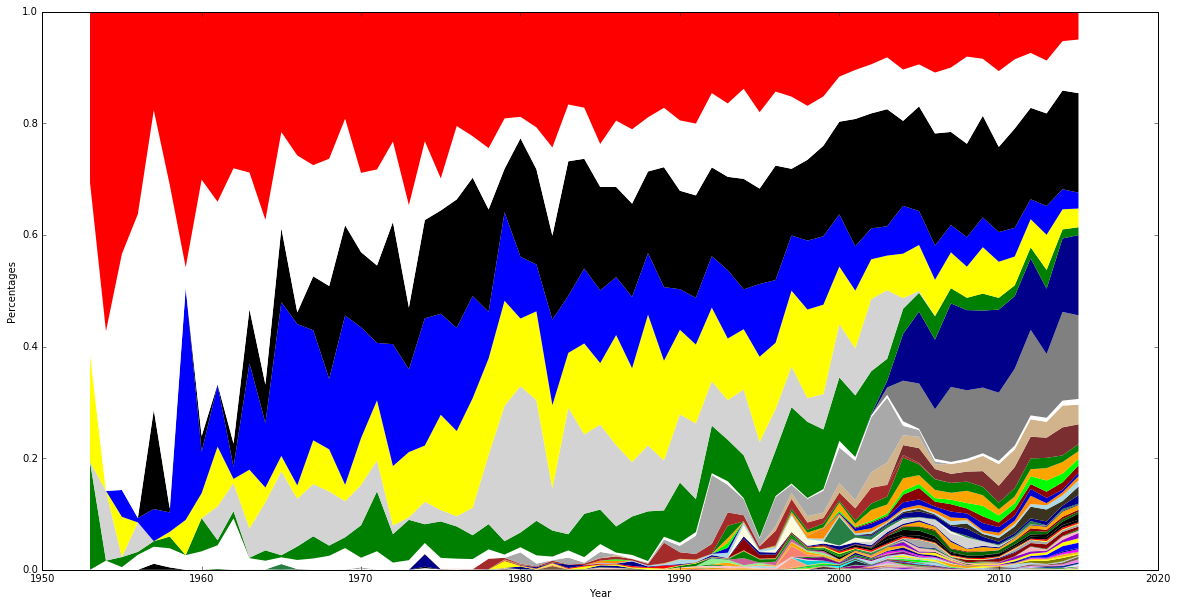

In [7]:
fig, ax = plt.subplots(1, 1, figsize=[20, 10])
ax.stackplot(dates, percent[sort, :],
             colors=[colors_dict[color] for color in colors[sort]],
             edgecolor='none')
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
plt.show()